In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
import numpy as np
import os
import json
import subprocess
import struct

%matplotlib inline

In [2]:
with open('sensor_config.json') as json_file:
    config = json.load(json_file)

In [3]:
df = pd.read_csv('./covid_19_clean_complete.csv')
print(df.columns)
df['Province/State'] = df['Province/State'].fillna('')

df['Name'] = df['Country/Region']# + '_' + df['Province/State']
df.loc[df['Province/State'] != '', 'Name'] = df['Country/Region'] + '_' + df['Province/State']
df['Name'] = df['Name'].str.replace('\'', '')
df['Name'] = df['Name'].str.replace(' ', '-')
df['Name'] = df['Name'].str[:36]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [10]:
print(df.sample(3).to_markdown(showindex=False))

| Province/State   | Country/Region   |     Lat |   Long | Date       |   Confirmed |   Deaths |   Recovered |   Active | WHO Region            | Name        |
|:-----------------|:-----------------|--------:|-------:|:-----------|------------:|---------:|------------:|---------:|:----------------------|:------------|
|                  | Bahrain          | 26.0275 |  50.55 | 2020-05-05 |        3720 |        8 |        1762 |     1950 | Eastern Mediterranean | Bahrain     |
| Macau            | China            | 22.1667 | 113.55 | 2020-03-07 |          10 |        0 |          10 |        0 | Western Pacific       | China_Macau |
|                  | Russia           | 60      |  90    | 2020-01-26 |           0 |        0 |           0 |        0 | Europe                | Russia      |


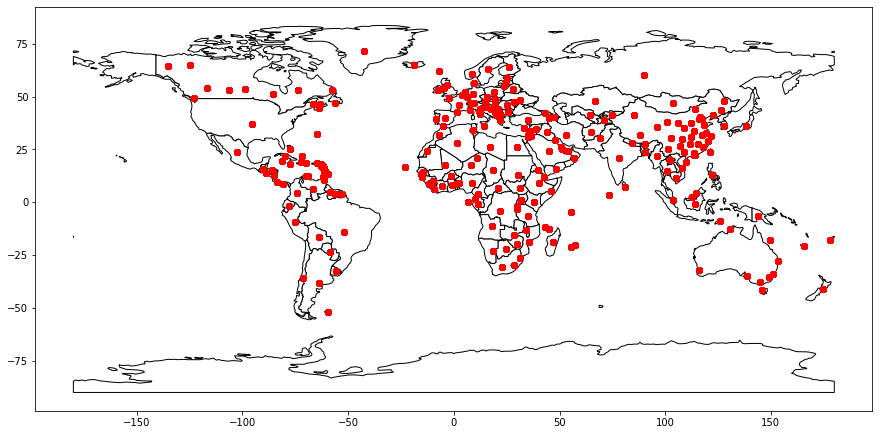

In [15]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(color='white', edgecolor='black', figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
plt = gdf.plot(ax=ax, color='red')

fig = plt.get_figure()
fig.savefig('./sensors_plotted.png', bbox_inches='tight')

In [16]:
df[df['Country/Region'] == 'Netherlands'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Name,geometry
164,Aruba,Netherlands,12.5186,-70.0358,2020-01-22,0,0.0,0,0.0,Europe,Netherlands_Aruba,POINT (-70.03580 12.51860)
165,Curacao,Netherlands,12.1696,-68.9900,2020-01-22,0,0.0,0,0.0,Europe,Netherlands_Curacao,POINT (-68.99000 12.16960)
166,Sint Maarten,Netherlands,18.0425,-63.0548,2020-01-22,0,0.0,0,0.0,Europe,Netherlands_Sint-Maarten,POINT (-63.05480 18.04250)
167,,Netherlands,52.1326,5.2913,2020-01-22,0,0.0,0,0.0,Europe,Netherlands,POINT (5.29130 52.13260)
425,Aruba,Netherlands,12.5186,-70.0358,2020-01-23,0,0.0,0,0.0,Europe,Netherlands_Aruba,POINT (-70.03580 12.51860)


In [37]:
df_locs = df.groupby(['Name', 'Lat', 'Long'])

counter = 0
for key, vals in df_locs:
    counter += 1
    name = key[0]
    
#     result = subprocess.run(['ttnctl', 'devices', 'delete', name], input='yes\n', encoding='ascii', shell=True, stdout=subprocess.PIPE)
    result = subprocess.run(['ttnctl', 'devices', 'register', name], encoding='ascii', shell=True, stdout=subprocess.PIPE)
    result = subprocess.run(['ttnctl', 'devices', 'set', name, '--latitude', str(key[2]), '--longitude', str(key[3])]
            , encoding='ascii', shell=True, stdout=subprocess.PIPE)
    print(result.stdout)
    
    print(f'Registered {name}. Device {counter}/{len(df_locs)}')

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=afghanistan

Registered Afghanistan. Device 1/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=albania

Registered Albania. Device 2/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                        

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=bahamas

Registered Bahamas. Device 19/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=bahrain

Registered Bahrain. Device 20/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           App

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=burundi

Registered Burundi. Device 36/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=cabo-verde

Registered Cabo-Verde. Device 37/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                        

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=chile

Registered Chile. Device 54/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=china_anhui

Registered China_Anhui. Device 55/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                          

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=china_jiangxi

Registered China_Jiangxi. Device 72/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=china_jilin

Registered China_Jilin. Device 73/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device          

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Registered Congo-(Kinshasa). Device 91/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=costa-rica

Registered Costa-Rica. Device 92/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Registered Cote-d'Ivoire. Device 93/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 App

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=ethiopia

Registered Ethiopia. Device 110/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=fiji

Registered Fiji. Device 111/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=ghana

Registered Ghana. Device 128/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=greece

Registered Greece. Device 129/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=m

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=italy

Registered Italy. Device 147/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=jamaica

Registered Jamaica. Device 148/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=malawi

Registered Malawi. Device 166/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=malaysia

Registered Malaysia. Device 167/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           A

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=netherlands_curacao

Registered Netherlands_Curacao. Device 184/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=netherlands_sint-maarten

Registered Netherlands_Sint-Maarten. Device 185/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.netw

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=qatar

Registered Qatar. Device 201/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=romania

Registered Romania. Device 202/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=somalia

Registered Somalia. Device 218/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=south-africa

Registered South-Africa. Device 219/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                  

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=turkey

Registered Turkey. Device 237/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=us

Registered US. Device 238/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaarti

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=venezuela

Registered Venezuela. Device 255/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                           AppID=mmaartijn DevID=vietnam

Registered Vietnam. Device 256/261
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Updated device                        

In [33]:
# Some data shuffling for events
df = df.groupby('Date', group_keys=False).apply(pd.DataFrame.sample, frac=1)

# def format_geo(val):
#     val = int(val * 10000)
#     if val >= 0:
#         return '01' + '{0:0{1}x}'.format(val, 8)
#     else:
#         return '000' + '{0:0{1}x}'.format(val, 8)[1:]

# df['Lat_hex'] = df['Lat'].apply(format_geo)
# df['Long_hex'] = df['Long'].apply(format_geo)

df['Date'] =  pd.to_datetime(df['Date'])
df['Date_hex'] = df['Date'].apply(lambda x: '{0:0{1}x}'.format(int(x.strftime('%Y%m%d')), 8))

df['Confirmed_hex'] = df['Confirmed'].astype(int).apply(lambda x: '{0:0{1}x}'.format(x, 6))
df['Deaths_hex'] = df['Deaths'].astype(int).apply(lambda x: '{0:0{1}x}'.format(x, 6))
df['Recovered_hex'] = df['Recovered'].astype(int).apply(lambda x: '{0:0{1}x}'.format(x, 6))
df['Active_hex'] = df['Active'].astype(int).apply(lambda x: '{0:0{1}x}'.format(x, 6))

df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Name,geometry,Date_hex,Confirmed_hex,Deaths_hex,Recovered_hex,Active_hex
243,,Kosovo,42.602636,20.902977,2020-01-22,0,0.0,0,0.0,Europe,Kosovo,POINT (20.90298 42.60264),01343aba,000000,000000,000000,000000
139,,Kazakhstan,48.019600,66.923700,2020-01-22,0,0.0,0,0.0,Europe,Kazakhstan,POINT (66.92370 48.01960),01343aba,000000,000000,000000,000000
2,,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0,0.0,Africa,Algeria,POINT (1.65960 28.03390),01343aba,000000,000000,000000,000000
56,Hainan,China,19.195900,109.745300,2020-01-22,4,0.0,0,4.0,Western Pacific,China_Hainan,POINT (109.74530 19.19590),01343aba,000004,000000,000000,000004
99,,Eritrea,15.179400,39.782300,2020-01-22,0,0.0,0,0.0,Africa,Eritrea,POINT (39.78230 15.17940),01343aba,000000,000000,000000,000000


In [38]:
mean = config['interval_seconds']
std = config['interval_seconds_standard_deviation']

selection = df[['Name', 'Date_hex', 'Confirmed_hex', 'Deaths_hex', 'Recovered_hex', 'Active_hex']]
counter = 0
for _, row in selection.iterrows():
    counter += 1
    device_id = row[0]
    value = ''.join(row[1:])
    result = subprocess.run(['ttnctl', 'devices', 'simulate', device_id, value]
                            , shell=True, stdout=subprocess.PIPE, encoding='ascii')
    print(result.stdout)
    print(f'Sent record {counter}/{selection.shape[0]}')
#     time.sleep(abs(np.random.normal(mean, std)))
#     break

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 23/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 24/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 25/36279
  INFO Using Application                        AppEUI=70B3D57ED002

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 45/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 46/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 47/36279
  INFO Using Application                        AppEUI=70B3D57ED002

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 67/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 68/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 69/36279
  INFO Using Application                        AppEUI=70B3D57ED002

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 89/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 90/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 91/36279
  INFO Using Application                        AppEUI=70B3D57ED002

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 111/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 112/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 113/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 133/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 134/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 135/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 154/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 155/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 156/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 176/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 177/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 178/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 198/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 199/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 200/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 220/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 221/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 222/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 242/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 243/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 244/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 264/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 265/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 266/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 286/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 287/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 288/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 308/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 309/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 310/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 330/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 331/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 332/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 352/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 353/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 354/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 374/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 375/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 376/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 396/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 397/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 398/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handle

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 418/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 419/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 420/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 440/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 441/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 442/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 462/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 463/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 464/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 484/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 485/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 486/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 505/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 506/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 507/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 527/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 528/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 529/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 549/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 550/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 551/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 571/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 572/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 573/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 593/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 594/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 595/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 615/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 616/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 617/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 637/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 638/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 639/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 659/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 660/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 661/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 681/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 682/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 683/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 702/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 703/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 704/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 724/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 725/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 726/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 746/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 747/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 748/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 768/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 769/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 770/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 790/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 791/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 792/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 812/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 813/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 814/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 834/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 835/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 836/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 856/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 857/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 858/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 878/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 879/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 880/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 900/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 901/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 902/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 922/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 923/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 924/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 944/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 945/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 946/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 966/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 967/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 968/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 988/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 989/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 990/36279
  INFO Using Application                        AppEUI=70B3D57ED

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1010/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1011/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1012/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1032/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1033/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1034/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1054/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1055/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1056/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1075/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1076/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1077/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1097/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1098/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1099/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1119/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1120/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1121/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1141/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1142/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1143/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1163/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1164/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1165/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1185/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1186/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1187/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1207/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 1208/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1209/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1229/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1230/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1231/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1251/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1252/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1253/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1273/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1274/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1275/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1295/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1296/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1297/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1317/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1318/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1319/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1339/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1340/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1341/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1361/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1362/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1363/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1383/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1384/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1385/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1405/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1406/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1407/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1426/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1427/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1428/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1448/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1449/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1450/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1470/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 1471/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1472/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1492/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1493/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1494/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1514/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1515/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1516/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1536/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1537/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1538/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1558/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1559/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1560/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1580/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1581/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1582/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1602/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1603/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1604/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1624/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1625/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1626/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1647/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1648/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1649/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1669/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1670/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1671/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1691/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1692/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1693/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1713/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1714/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1715/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1735/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1736/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1737/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1757/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1758/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1759/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1778/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1779/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1780/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1800/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1801/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1802/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1822/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1823/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1824/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1844/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1845/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1846/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1866/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1867/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1868/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1888/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1889/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1890/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1910/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1911/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1912/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1933/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1934/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1935/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1955/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1956/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1957/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1977/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1978/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1979/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 1999/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
 ERROR Simulate failed                          error=Could not simulate uplink: handler:device:mmaartijn:cote-divoire not found source=Wrap: /go/pkg/mod/github.com/!the!things!network/ttn/utils/errors@v0.0.0-20190516093004-b66899428ed5/errors.go:222

Sent record 2000/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Conne

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2020/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2021/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2022/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2042/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2043/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2044/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2064/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2065/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2066/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2086/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2087/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2088/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2108/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2109/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2110/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2130/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2131/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2132/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2151/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2152/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2153/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2173/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2174/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2175/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2195/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2196/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2197/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2217/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2218/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2219/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2239/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 2240/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2241/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2261/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2262/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2263/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2283/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2284/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2285/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2305/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2306/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2307/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2327/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2328/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2329/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2349/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2350/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2351/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2371/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2372/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2373/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2393/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2394/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2395/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2415/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2416/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2417/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2437/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2438/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2439/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2459/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2460/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2461/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2480/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2481/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2482/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2502/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2503/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2504/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2524/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2525/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2526/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2546/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2547/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2548/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2568/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2569/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2570/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2590/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2591/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2592/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2612/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2613/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2614/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2634/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2635/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2636/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2656/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2657/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2658/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2677/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2678/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2679/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2699/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2700/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2701/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2721/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2722/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2723/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2743/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2744/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2745/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2765/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2766/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2767/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2787/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 2788/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2789/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2809/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2810/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2811/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2831/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2832/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2833/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2853/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2854/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2855/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2875/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2876/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2877/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2897/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2898/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 2899/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2919/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2920/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2921/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2941/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2942/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2943/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2963/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2964/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2965/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2985/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2986/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 2987/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3007/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3008/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3009/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3029/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3030/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3031/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3051/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3052/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3053/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3073/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3074/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3075/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3095/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3096/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
 ERROR Simulate failed                          error=Could not simulate uplink: handler:device:mmaartijn:cote-divoire not found sour

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3116/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3117/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3118/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3138/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3139/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3140/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3160/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3161/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3162/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3182/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3183/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3184/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3204/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3205/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3206/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3226/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3227/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3228/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3248/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3249/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3250/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3270/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3271/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3272/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3292/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3293/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3294/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3314/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3315/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3316/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3335/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3336/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3337/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3357/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3358/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3359/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3379/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3380/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3381/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3401/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3402/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3403/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3423/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3424/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3425/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3445/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3446/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3447/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3467/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3468/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3469/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3489/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3490/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3491/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3511/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3512/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3513/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3533/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3534/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3535/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3555/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3556/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3557/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3577/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3578/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3579/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3599/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3600/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3601/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3621/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3622/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3623/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3643/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3644/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3645/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3664/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3665/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3666/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3686/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3687/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3688/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3708/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3709/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3710/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3730/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3731/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3732/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3752/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3753/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3754/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3774/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3775/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3776/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3796/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3797/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3798/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3817/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3818/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3819/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3839/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3840/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3841/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3861/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3862/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3863/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3883/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3884/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3885/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3905/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3906/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3907/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3927/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 3928/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3929/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3949/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3950/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3951/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3971/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3972/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3973/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3993/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 3994/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
 FATAL Device ID not valid: has wrong format. IDs can contain lowercase letters, numbers, dashes and underscores and should have a maximum length of 36

Sent record 3995/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Han

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4015/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4016/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4017/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4037/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4038/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4039/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4059/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4060/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4061/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4081/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4082/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4083/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4103/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4104/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4105/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4125/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4126/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4127/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4147/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4148/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4149/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4169/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4170/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4171/36279
  INFO Using Application                        AppEUI=70B3D5

  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4191/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4192/36279
  INFO Using Application                        AppEUI=70B3D57ED0029CC8 AppID=mmaartijn
  INFO Discovering Handler...                   Handler=ttn-handler-eu
  INFO Connecting with Handler...               Handler=eu.thethings.network:1904
  INFO Simulated uplink sent                   

Sent record 4193/36279
  INFO Using Application                        AppEUI=70B3D5

KeyboardInterrupt: 

# Berekenen kosten

* Gemiddeld 103 koeien per melkveebedrijf in NL
* 2 keer per dag melken
* 2 Megapixel foto's = 1 byte per color * 3 colors / pixel * 2M pixels = 6MB per foto
* S3 storage = $0.0245 per GB

In [68]:
cows = 103
milk = 2
mega_pixel = 12
photo_size = mega_pixel * 3 # bytes
print(photo_size)
s3_price_per_gb = 0.0245

per_day = cows * milk * photo_size
print(f'{per_day}MB storage per day')
per_year = per_day * 365
per_year_GB = '{:.2f}'.format(per_year / 1024)
print(f'{per_year}MB = {per_year_GB}GB storage per year')

price_per_year = per_year / 1024 * s3_price_per_gb
print('$' + '{:.2f}'.format(price_per_year) + ' per year')

36
7416MB storage per day
2706840MB = 2643.40GB storage per year
$64.76 per year


AWS S3
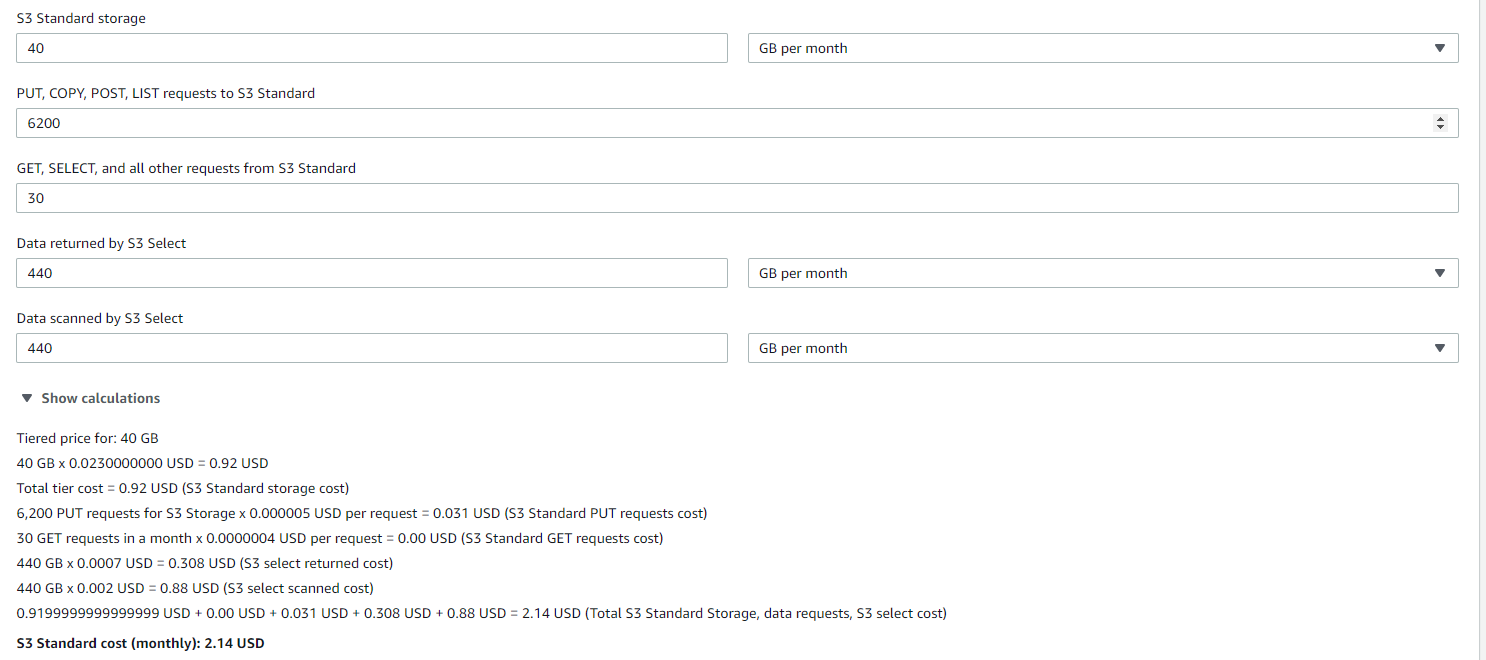

Azure
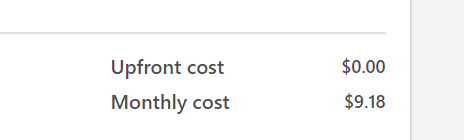

In [64]:
hectare = 100 * 100
m2_per_sensor = 10
sensors = hectare / m2_per_sensor
minutes_interval = 30
times_per_day = 24 * 60 / minutes_interval

per_day = sensors * times_per_day
per_year = 365 * per_day

print(per_year)

bytes_per_message = 10
kb_per_message = bytes_per_message / 1024
mb_per_message = kb_per_message / 1024
gb_per_message = mb_per_message / 1024

print(str(round(per_year * mb_per_message, 2)) + 'MB')

17520000.0
167.08MB


In [70]:
# Amazon Sagemaker
building_pph = 0.0536
processing_pph = 0.0536
training_pph = 0.161
deployment_pph = 0.075

building_y = building_pph * 40
processing_y = processing_pph * 40
training_y = 365 * 4 # four hours a night
deployment_y = deployment_pph * 365 * 24

per_year = building_y + processing_y + training_y + deployment_y
print(per_year)
print(per_year / 12)

2121.288
176.774
